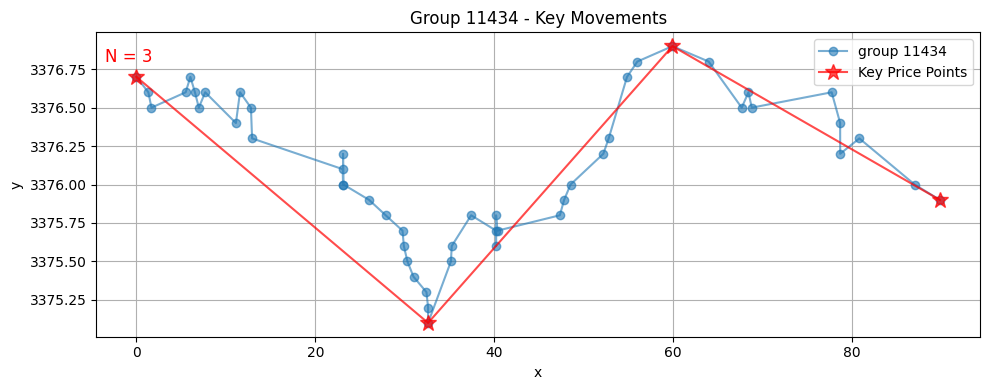

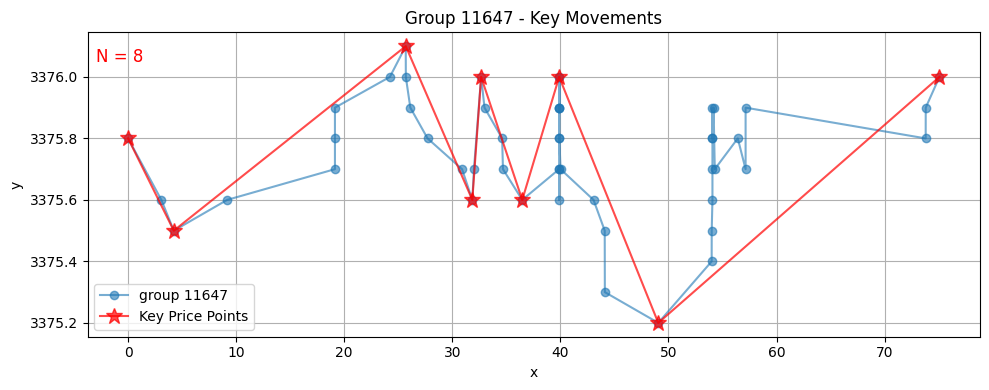

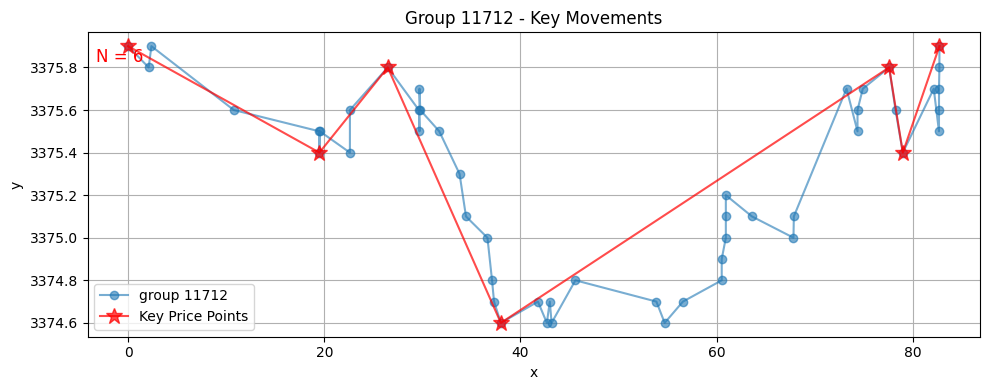

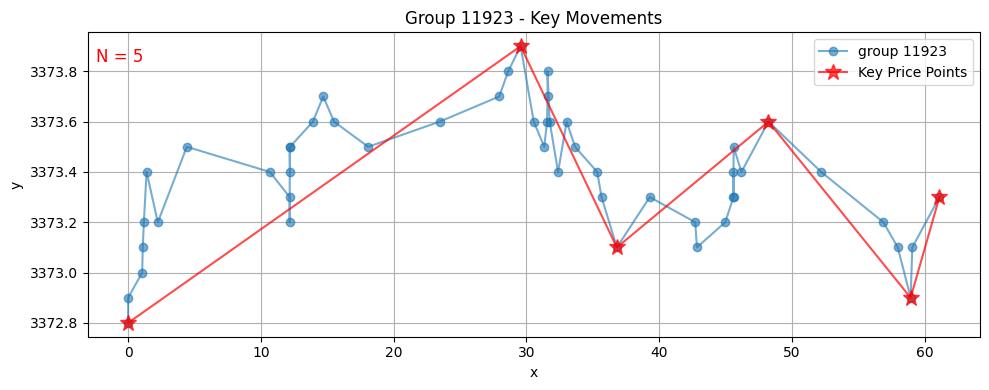

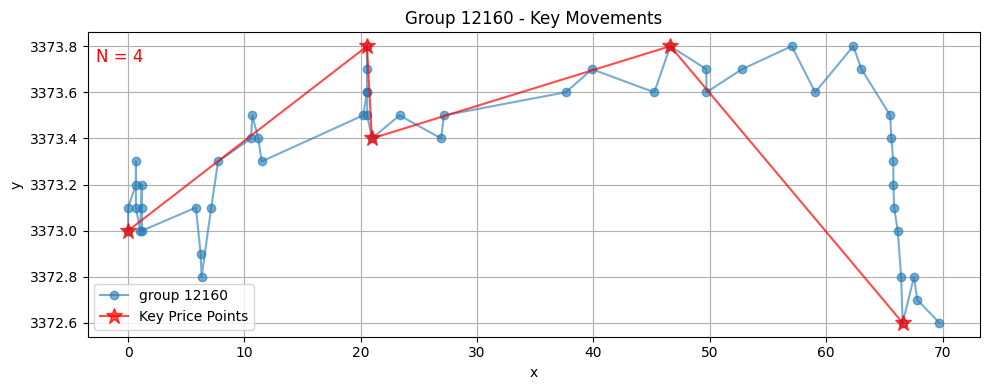

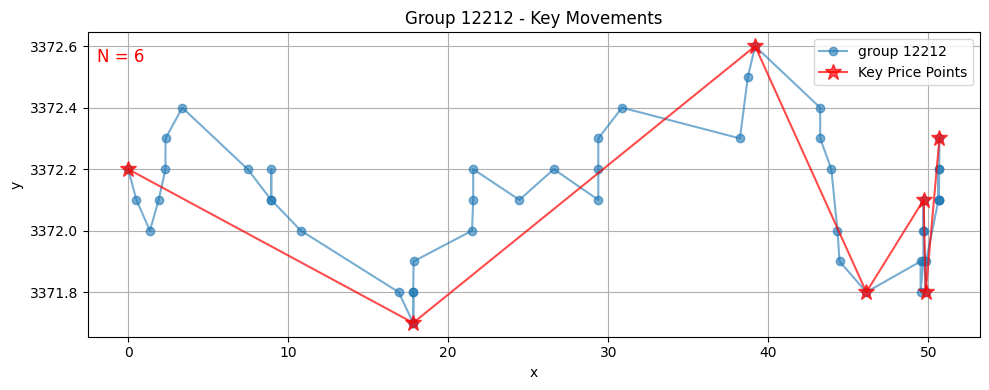

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv("sample_9.csv", encoding="utf-8")
groups = df["group"].unique()

# ÂèÇÊï∞ËÆæÁΩÆ
percent = 0.3
tick_size = 0.1

# Á≠õÈÄâÂÖ≥ÈîÆ‰ª∑Ê†ºÂèòÂä®ÁÇπ
def filter_price_movements(df, percent, tick_size):
    height = df.y.max() - df.y.min()
    
    change_pips = height * percent / tick_size
    ChangePips = change_pips * tick_size

    df = df.sort_values("x").reset_index(drop=True)
    PriceList = []
    TimeList = []

    for i in range(len(df)):
        price = df.loc[i, "y"]
        time = df.loc[i, "x"]

        if len(PriceList) == 0:
            PriceList.append(price)
            TimeList.append(time)
        elif len(PriceList) == 1:
            if abs(price - PriceList[-1]) > ChangePips:
                PriceList.append(price)
                TimeList.append(time)
        else:
            last_diff = PriceList[-1] - PriceList[-2]
            new_diff = price - PriceList[-1]

            if last_diff * new_diff > 0:  # ÂêåÊñπÂêëÂèòÂåñ
                PriceList[-1] = price
                TimeList[-1] = time
            elif abs(new_diff) > ChangePips:
                PriceList.append(price)
                TimeList.append(time)

    return pd.DataFrame({"x": TimeList, "y": PriceList})


# ‰∏∫ÊØè‰∏™ group ÂçïÁã¨ÁîªÂõæ
for group_id in groups:
    group_df = df[df["group"] == group_id].sort_values("x")
    group_filtered_df = filter_price_movements(group_df, percent, tick_size)

    # ÂçïÁã¨ÂàõÂª∫ÂõæÂíåÂùêÊ†áËΩ¥
    plt.figure(figsize=(10, 4), dpi=100)
    plt.plot(group_df["x"], group_df["y"], "o-", alpha=0.6, label=f"group {group_id}")

    if not group_filtered_df.empty:
        plt.plot(group_filtered_df["x"], group_filtered_df["y"], "r*-", markersize=12, label="Key Price Points", alpha=0.7)

        # Ê∑ªÂä†ÂÖ≥ÈîÆÁÇπÊï∞ÈáèÊ†áËÆ∞
        point_count = len(group_filtered_df)
        plt.text(0.01, 0.95, f"N = {point_count - 1}", transform=plt.gca().transAxes,
                 fontsize=12, verticalalignment='top', color='red')

    plt.title(f"Group {group_id} - Key Movements")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Âä†‰∏äÂ≥∞Â∫¶ÂíåÂÅèÂ∫¶

## Â≥∞Â∫¶
‰∏∫‰ªÄ‰πàÁõ¥ÊñπÂõæ‰∏çËÉΩÂÆåÂÖ®ÂèçÊò†Â≥∞Â∫¶Ôºü
Áõ¥ÊñπÂõæÂ±ïÁ§∫ÁöÑÊòØÊï∞ÊçÆÁöÑÈ¢ëÊï∞ÂàÜÂ∏ÉÔºåÁúãËµ∑Êù•ÂÉèÊòØ‚ÄúÂΩ¢Áä∂‚ÄùÁöÑÂø´ÁÖß ‚úÖ„ÄÇ

Â≥∞Â∫¶ÂÖ≥Ê≥®ÁöÑÊòØÂàÜÂ∏É‰∏≠ÂøÉÊòØÂê¶Â∞ñÈîêÔºåÂ∞æÈÉ®ÊòØÂê¶ÂéöÈáçÔºö

Âç≥‰Ωø‰∏≠Èó¥ bin ÈùûÂ∏∏È´òÔºàÂÉèÂ±±Â≥∞ÔºâÔºåÂ¶ÇÊûúÂ∞æÈÉ®Ê≤°ÊúâÂÄº ‚Üí Â≥∞Â∫¶ÂèØËÉΩ‰ªçËæÉ‰Ωé„ÄÇ

Áõ∏ÂèçÔºåËã•ÊúâÂ∞ëÊï∞ËøúÁ¶ªÂùáÂÄºÁöÑÊûÅÁ´ØÂÄº ‚Üí ‰ºöÂ§ßÂπÖÊãâÈ´òÂ≥∞Â∫¶Ôºå‰ΩÜÂú®Áõ¥ÊñπÂõæ‰∏≠ÂÆÉ‰ª¨ÂèØËÉΩÂè™ÊòØ‰∏Ä‰∏§‰∏™ bin ‰∏≠ÂæÆÂ∞èÁöÑÊù°ÂΩ¢„ÄÇ

## ÂÅèÂ∫¶
Áõ¥ÊñπÂõæ‰∏éÂÅèÂ∫¶ÁöÑÁõ¥ËßÇÂÖ≥ËÅî
Áõ¥ÊñπÂõæÂΩ¢Áä∂ÊòéÊòæÂÅèÂêë‰∏Ä‰æßÊó∂ÔºåÂ∞±ÂèØ‰ª•ÂàùÊ≠•Êé®Êñ≠ÂÅèÂ∫¶ÁöÑÁ¨¶Âè∑Ôºö

üìà Âè≥‰æßÊãñÂ∞æÔºàÂè≥ÂÅèÔºâÔºöÂ∞æÂ∑¥Âú®Âè≥Ëæπ ‚Üí ÂÅèÂ∫¶ÂÄº > 0

üìâ Â∑¶‰æßÊãñÂ∞æÔºàÂ∑¶ÂÅèÔºâÔºöÂ∞æÂ∑¥Âú®Â∑¶Ëæπ ‚Üí ÂÅèÂ∫¶ÂÄº < 0

‚¨áÔ∏è ÂØπÁß∞ÈíüÂΩ¢ÂõæÔºöÂùáÂåÄÂàÜÂ∏ÉÂú®‰∏≠ÂøÉ‰∏§‰æß ‚Üí ÂÅèÂ∫¶ÂÄº ‚âà 0

/tmp/ipykernel_30032/3763130620.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


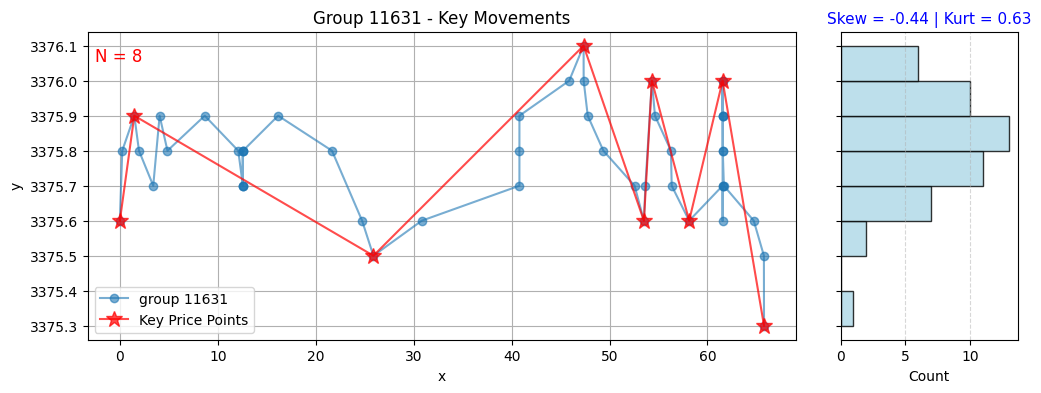

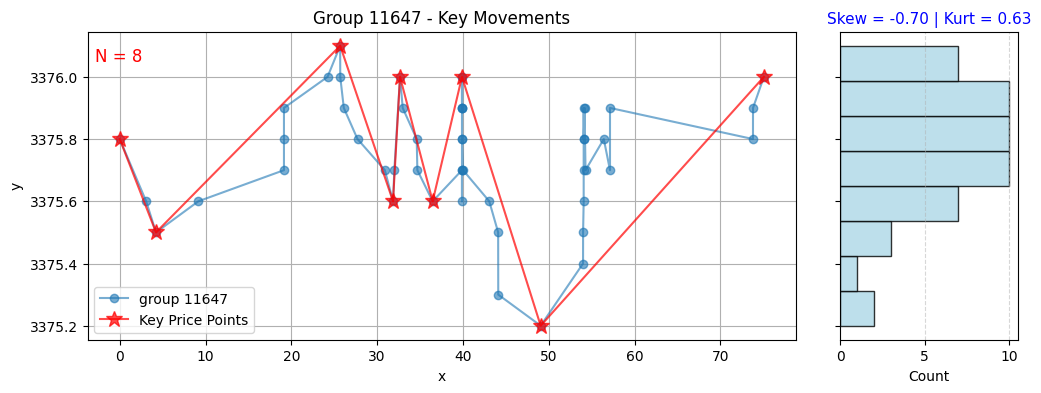

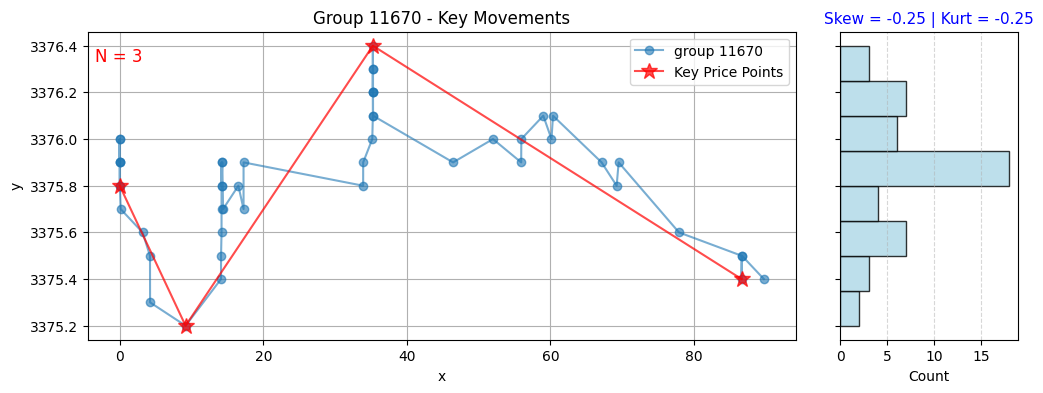

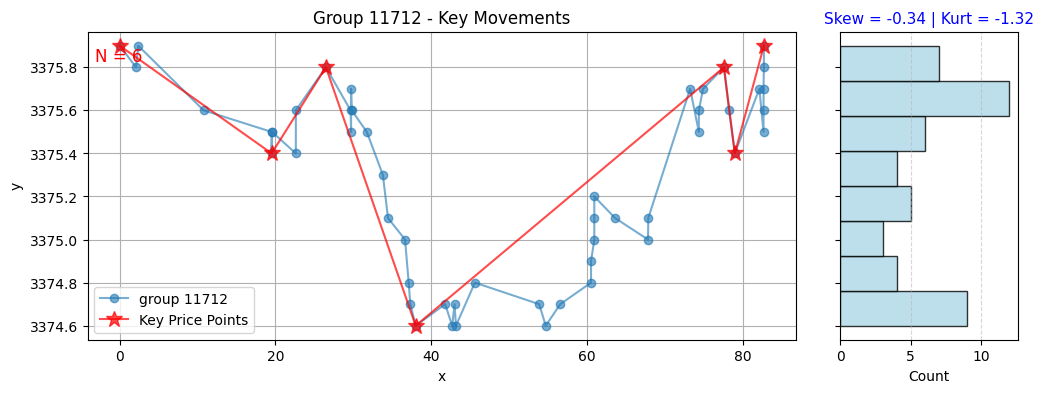

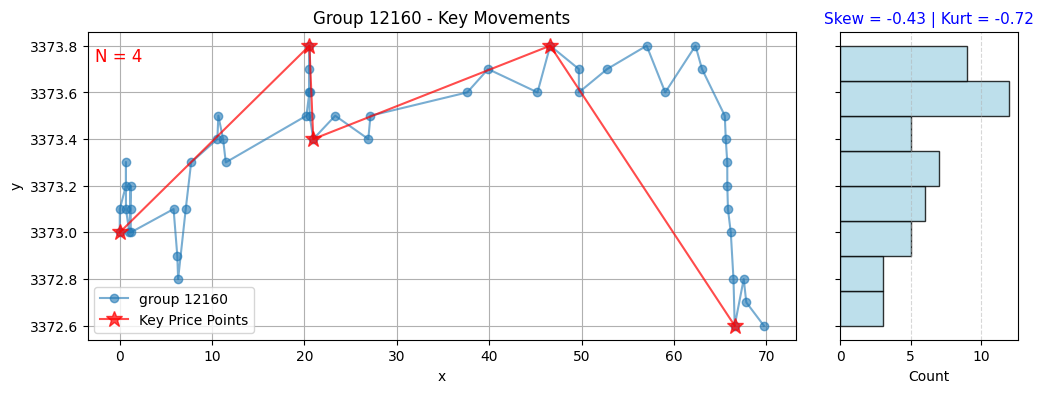

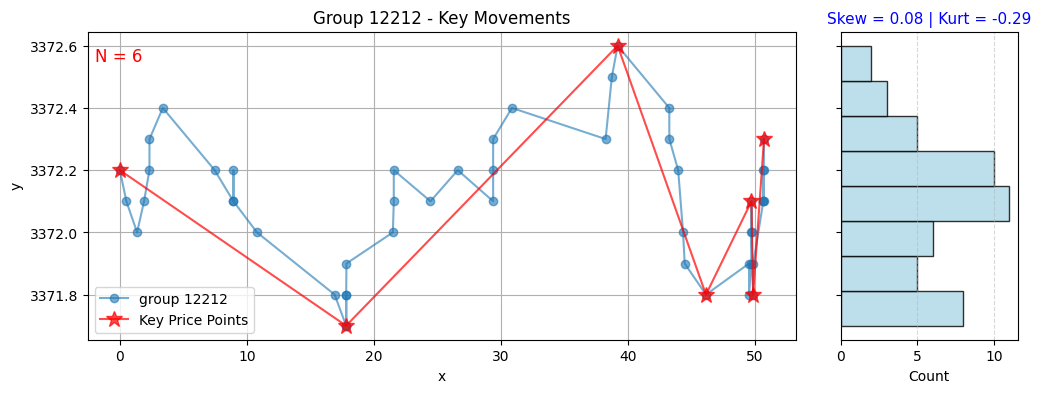

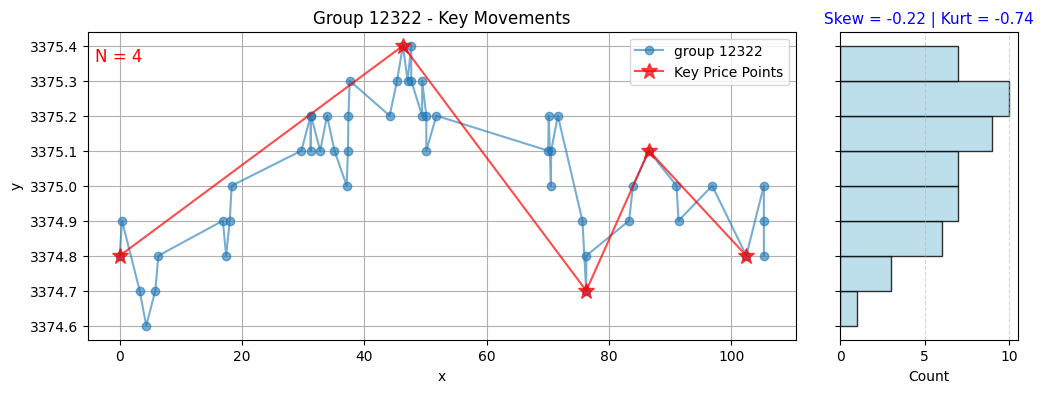

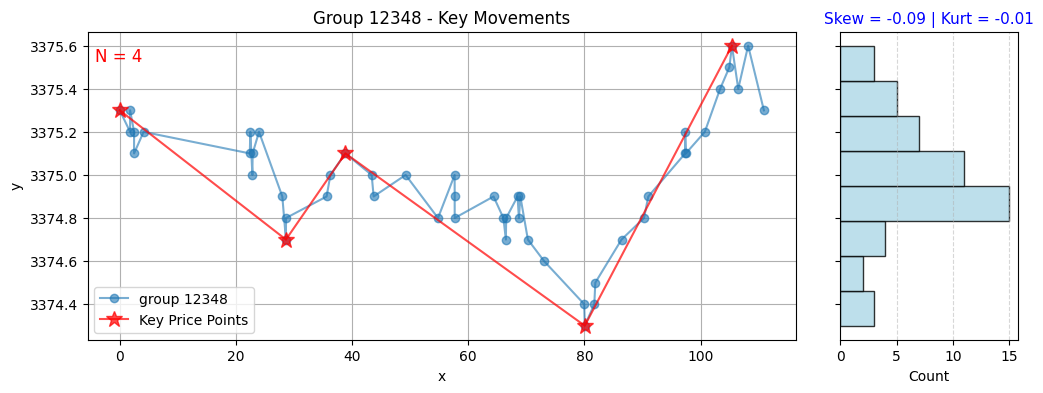

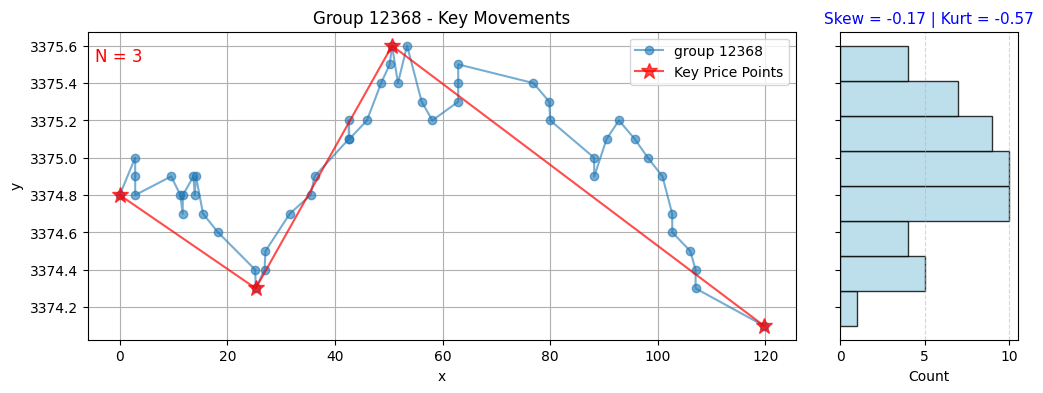

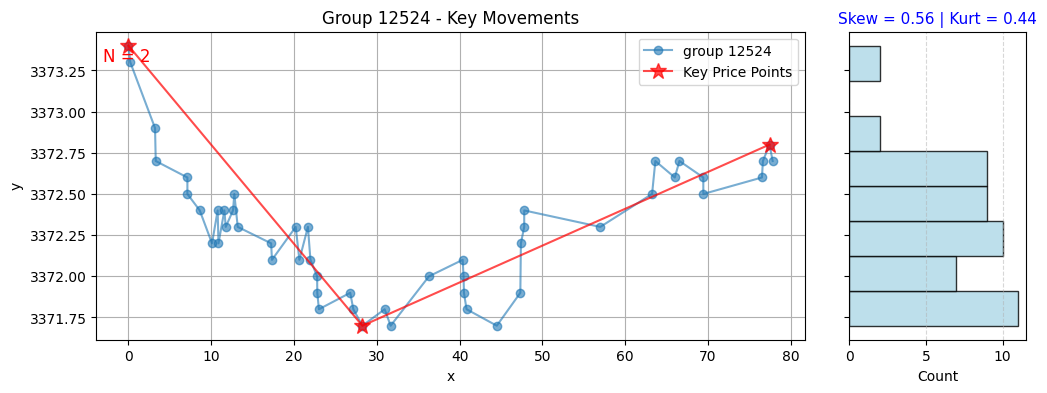

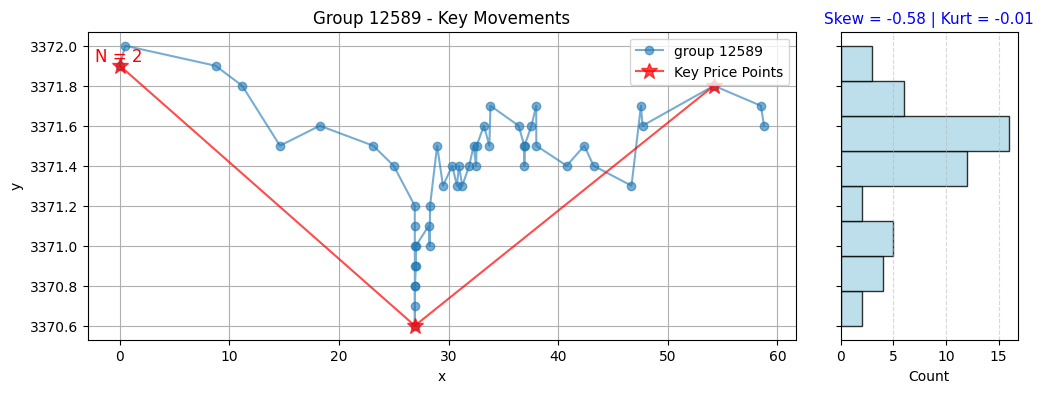

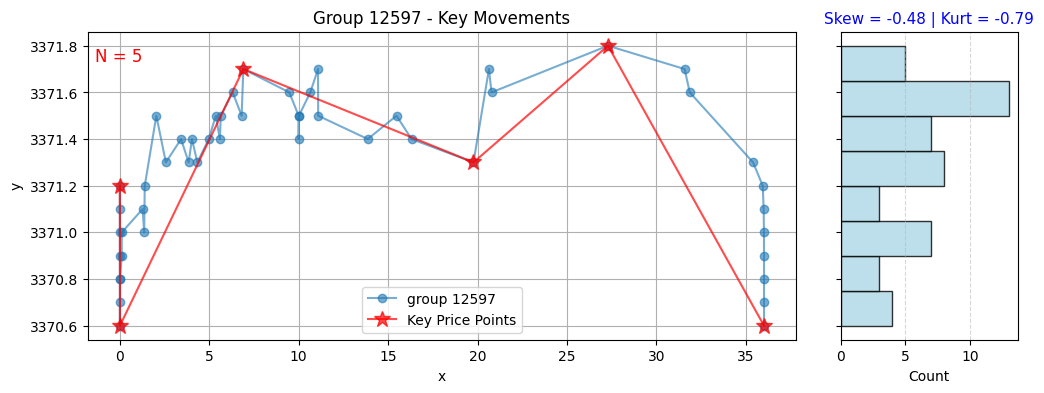

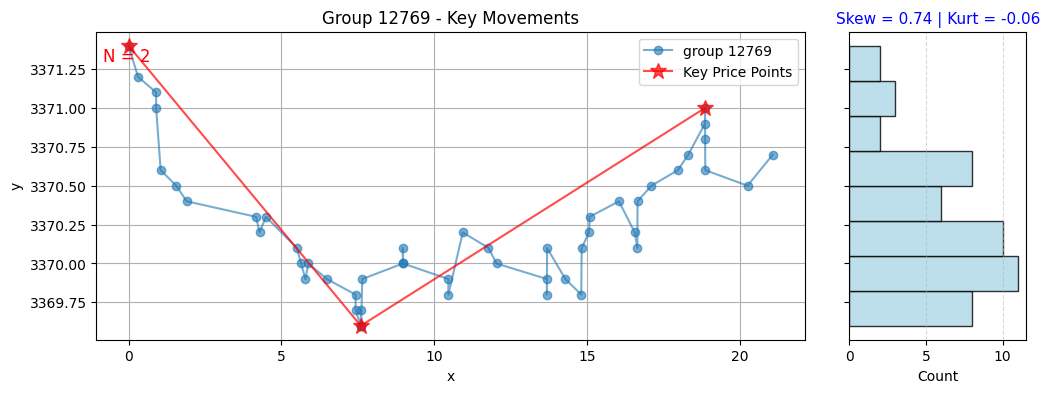

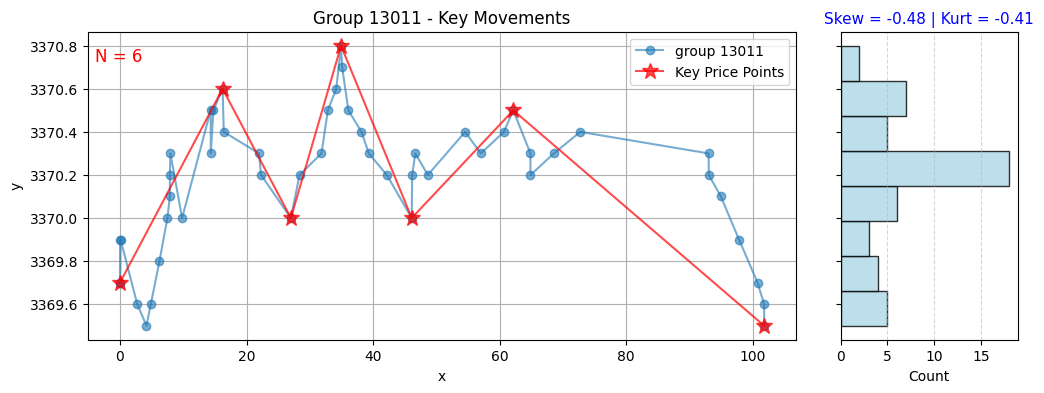

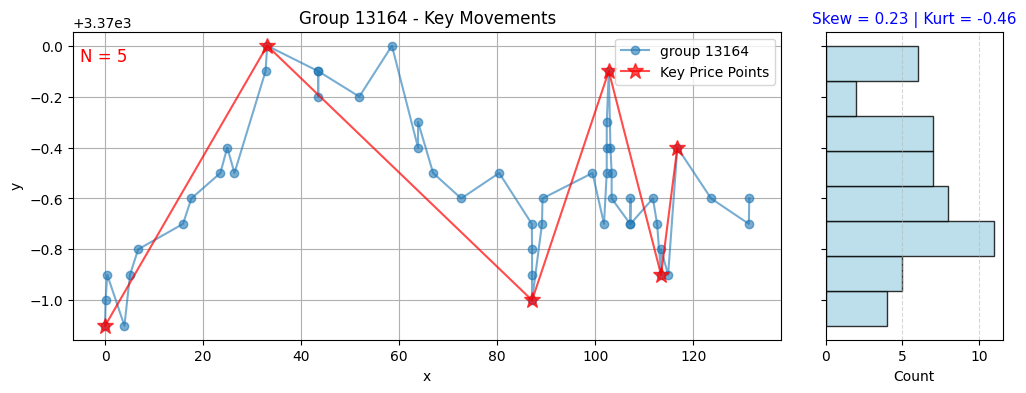

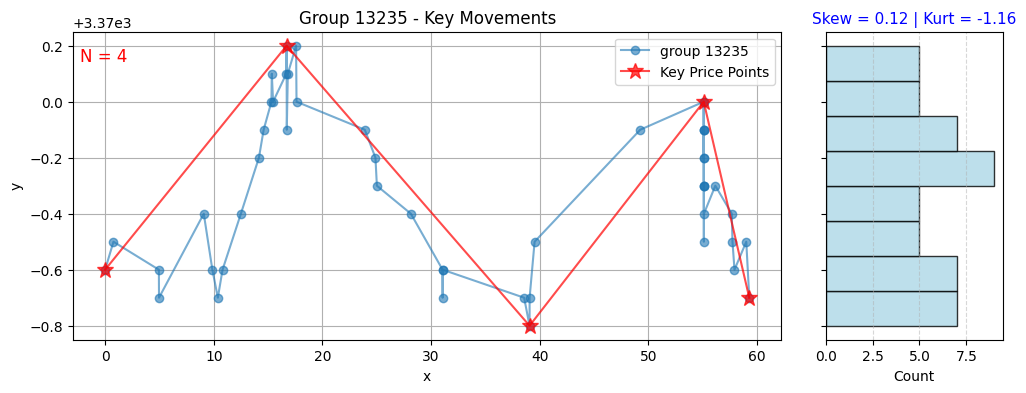

In [17]:
import pandas as pd
import numpy as np
import matplotlib  # ‚úÖ Ë°•‰∏äËøô‰∏ÄÂè•
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import kurtosis, skew  # ‚úÖ Âä†ÂÖ•ÂÅèÂ∫¶ËÆ°ÁÆó

# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv("sample_30.csv", encoding="utf-8")
groups = df["group"].unique()

# ÂèÇÊï∞ËÆæÁΩÆ
percent = 0.3
tick_size = 0.1
bin_count = 8  # yËΩ¥ÂàÜ bin Êï∞

# Á≠õÈÄâÂÖ≥ÈîÆ‰ª∑Ê†ºÂèòÂä®ÁÇπÂáΩÊï∞
def filter_price_movements(df, percent, tick_size):
    height = df.y.max() - df.y.min()
    change_pips = height * percent / tick_size
    ChangePips = change_pips * tick_size

    df = df.sort_values("x").reset_index(drop=True)
    PriceList = []
    TimeList = []

    for i in range(len(df)):
        price = df.loc[i, "y"]
        time = df.loc[i, "x"]

        if len(PriceList) == 0:
            PriceList.append(price)
            TimeList.append(time)
        elif len(PriceList) == 1:
            if abs(price - PriceList[-1]) > ChangePips:
                PriceList.append(price)
                TimeList.append(time)
        else:
            last_diff = PriceList[-1] - PriceList[-2]
            new_diff = price - PriceList[-1]

            if last_diff * new_diff > 0:
                PriceList[-1] = price
                TimeList[-1] = time
            elif abs(new_diff) > ChangePips:
                PriceList.append(price)
                TimeList.append(time)

    return pd.DataFrame({"x": TimeList, "y": PriceList})


# ‰∏∫ÊØè‰∏™ group ÂçïÁã¨ÁîüÊàêÂõæ
for group_id in groups:
    group_df = df[df["group"] == group_id].sort_values("x")
    group_filtered_df = filter_price_movements(group_df, percent, tick_size)

    # ÂõæÂ∏ÉÂ±Ä
    fig = plt.figure(figsize=(12, 4), dpi=100)
    gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[4, 1], wspace=0.1)

    ax_main = fig.add_subplot(gs[0])
    ax_hist = fig.add_subplot(gs[1], sharey=ax_main)

    # ‰∏ªÂõæÔºö‰ª∑Ê†ºÁ∫ø‰∏éÂÖ≥ÈîÆÁÇπ
    ax_main.plot(group_df["x"], group_df["y"], "o-", alpha=0.6, label=f"group {group_id}")
    if not group_filtered_df.empty:
        ax_main.plot(group_filtered_df["x"], group_filtered_df["y"], "r*-", markersize=12, label="Key Price Points", alpha=0.7)

        point_count = len(group_filtered_df)
        ax_main.text(0.01, 0.95, f"N = {point_count - 1}", transform=ax_main.transAxes,
                     fontsize=12, verticalalignment='top', color='red')

    ax_main.set_title(f"Group {group_id} - Key Movements")
    ax_main.set_xlabel("x")
    ax_main.set_ylabel("y")
    ax_main.legend()
    ax_main.grid(True)

    # y ÂÄºÁõ¥ÊñπÂõæ
    y_vals = group_df["y"].values
    counts, bin_edges = np.histogram(y_vals, bins=bin_count)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    ax_hist.barh(
        bin_centers, counts,
        height=bin_edges[1] - bin_edges[0],
        color='lightblue',
        alpha=0.8,
        edgecolor='black'
    )
    ax_hist.set_xlabel("Count")
    ax_hist.tick_params(labelleft=False)
    ax_hist.grid(True, axis='x', linestyle='--', alpha=0.5)

    # ‚úÖ ÊòæÁ§∫ Skewness Âíå Kurtosis
    skew_val = skew(y_vals, bias=False)
    kurt_val = kurtosis(y_vals, fisher=True, bias=False)
    ax_hist.set_title(f"Skew = {skew_val:.2f} | Kurt = {kurt_val:.2f}", fontsize=11, color='blue')

    # ÊòæÁ§∫Âõæ
    fig.canvas.draw()
    plt.tight_layout()
    plt.show()


In [7]:
# !pip install scipy
